## Import TensorFlow and other libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

### Load the dataset

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

4431872/4422102 [==============================] - 7s 2us/step
(60000, 28, 28)
(10000, 28, 28)


### First Example: Basic Autoencoder

Define an autoencoder with two Dense layers: an encoder, which compresses the images into a 64 dimensional latent vector, and a decoder, that reconstructs the original image from the latent space.

We will accomplish this by using the keras model subclassing API

In [3]:
latent_dim = 64

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28)),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-01-27 15:37:50.580073: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-27 15:37:50.580982: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Train the model using `x_train` as both the input and the target (output). The `encoder` will learn to compress the dataaset from 784 dimensions to 64, while the `decoder` will learn to reconstruct the original images.

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

2023-01-27 15:45:00.521604: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2023-01-27 15:45:00.723340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.0241

2023-01-27 15:45:07.059565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.0241 - val_loss: 0.0136
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0119 - val_loss: 0.0109
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0097 - val_loss: 0.0096
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0091 - val_los

After completing the model training, we can now test it by encoding and decoding images from the test set. 

In [6]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

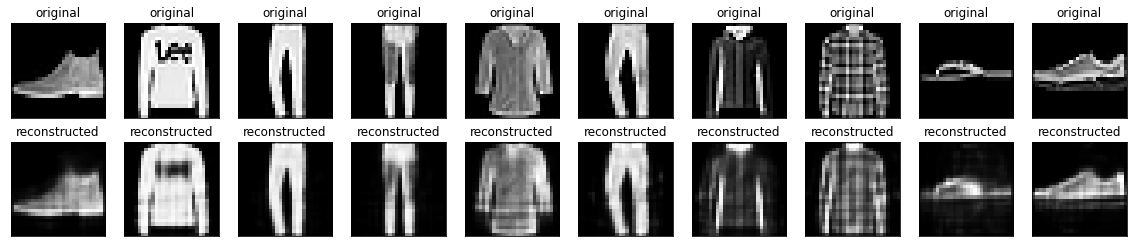

In [8]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2,n,i+n+1)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()